# sale report

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets (update file paths as needed)
sale_report = pd.read_csv("/content/Sale Report.csv")  # Example file

# Display basic information
sale_report.info()
sale_report.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9271 entries, 0 to 9270
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             9271 non-null   int64  
 1   Product_SKU       9188 non-null   object 
 2   Design_Number     9235 non-null   object 
 3   Stock_Level       9235 non-null   float64
 4   Product_Category  9226 non-null   object 
 5   Product_Size      9235 non-null   object 
 6   Product_Color     9226 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 507.1+ KB


,index,Product_SKU,Design_Number,Stock_Level,Product_Category,Product_Size,Product_Color
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red


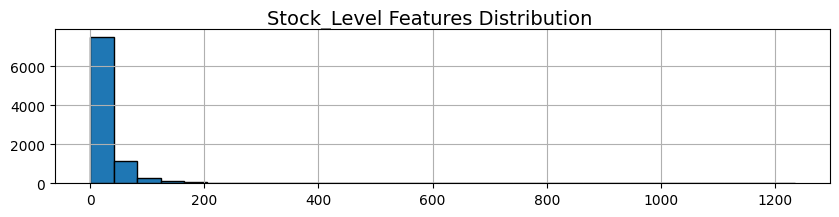

In [ ]:
sale_report['Stock_Level'].hist(figsize=(10, 2), bins=30, edgecolor='black')
plt.suptitle("Stock_Level Features Distribution", fontsize=14)
plt.show()


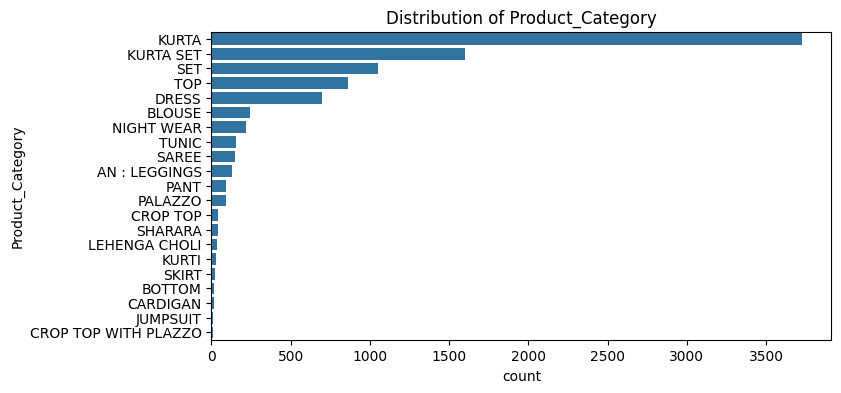

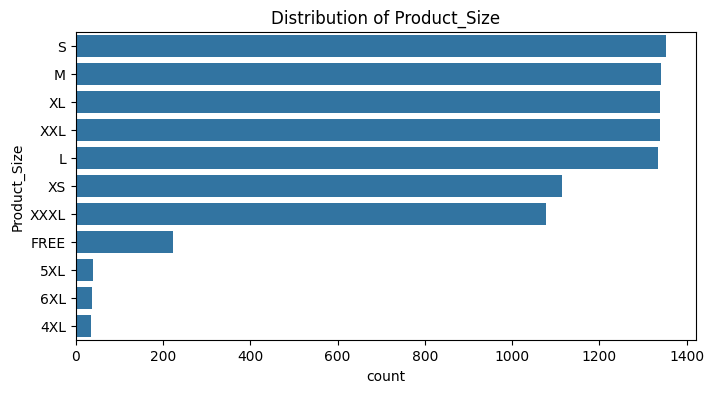

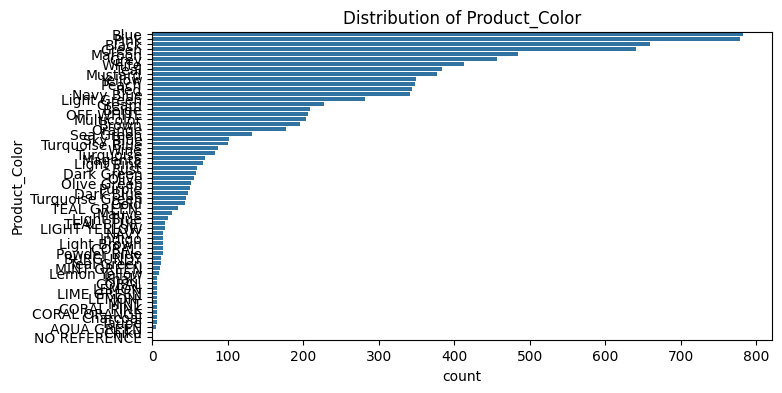

In [ ]:
for col in ["Product_Category", "Product_Size", "Product_Color"]:
    plt.figure(figsize=(8, 4))
    sns.countplot(y=sale_report[col], order=sale_report[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.show()


In [ ]:
for col in ["Product_Category", "Product_SKU", "Product_Size"]:
    print(f"{col}: {sale_report[col].nunique()} unique values")


Product_Category: 21 unique values
Product_SKU: 9170 unique values
Product_Size: 11 unique values


# P  L March 2021

In [ ]:
df  = pd.read_csv("/content/P  L March 2021.csv")

# Display basic information
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   index                   1330 non-null   int64 
 1   Product_SKU             1330 non-null   object
 2   Product_Style_ID        1330 non-null   object
 3   Product_Catalog         1330 non-null   object
 4   Product_Category        1330 non-null   object
 5   Product_Weight          1330 non-null   object
 6   Transfer_Price_Level_1  1330 non-null   object
 7   Transfer_Price_Level_2  1330 non-null   object
 8   Old_MRP                 1330 non-null   object
 9   Final_Old_MRP           1330 non-null   object
 10  Ajio_MRP                1330 non-null   object
 11  Amazon_MRP              1330 non-null   object
 12  Amazon_FBA_MRP          1330 non-null   object
 13  Flipkart_MRP            1330 non-null   object
 14  Limeroad_MRP            1330 non-null   object
 15  Mynt

,index,Product_SKU,Product_Style_ID,Product_Catalog,Product_Category,Product_Weight,Transfer_Price_Level_1,Transfer_Price_Level_2,Old_MRP,Final_Old_MRP,Ajio_MRP,Amazon_MRP,Amazon_FBA_MRP,Flipkart_MRP,Limeroad_MRP,Myntra_MRP,Paytm_MRP\n,Snapdeal_MRP
0,0,Os206_3141_S,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
1,1,Os206_3141_M,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
2,2,Os206_3141_L,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
3,3,Os206_3141_XL,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295
4,4,Os206_3141_2XL,Os206_3141,Moments,Kurta,0.3,538,435.78,2178,2295,2295,2295,2295,2295,2295,2295,2295,2295


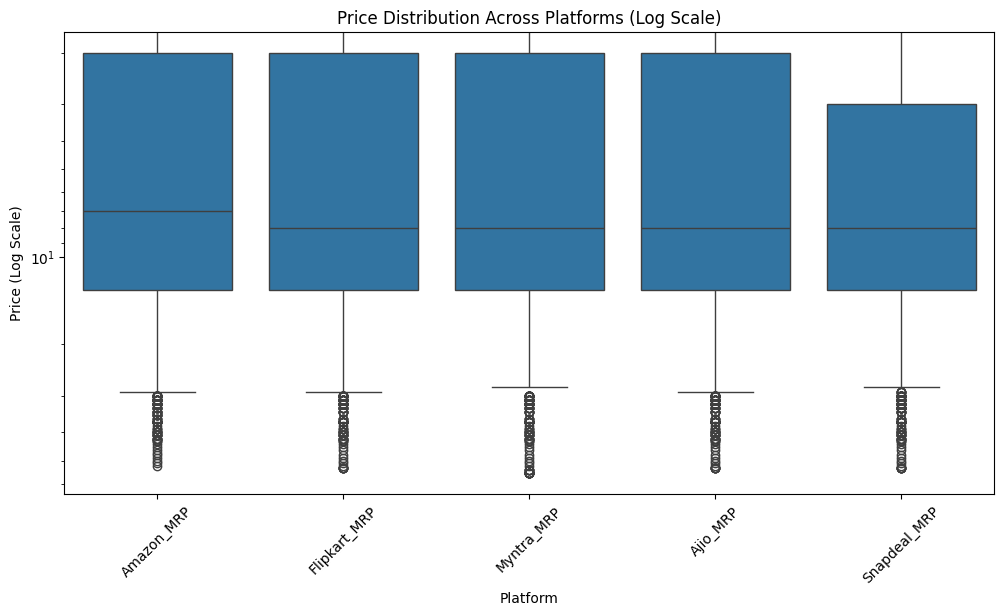

In [ ]:
# 1️⃣ Boxplot - Pricing Comparison Across Platforms (Log Scale)
plt.figure(figsize=(12, 6))
price_columns = ["Amazon_MRP", "Flipkart_MRP", "Myntra_MRP", "Ajio_MRP", "Snapdeal_MRP"]
df_melted = df.melt(value_vars=price_columns, var_name="Platform", value_name="Price")

sns.boxplot(x="Platform", y="Price", data=df_melted)
plt.yscale("log")  # Apply log scale
plt.title("Price Distribution Across Platforms (Log Scale)")
plt.xticks(rotation=45)
plt.ylabel("Price (Log Scale)")
plt.show()


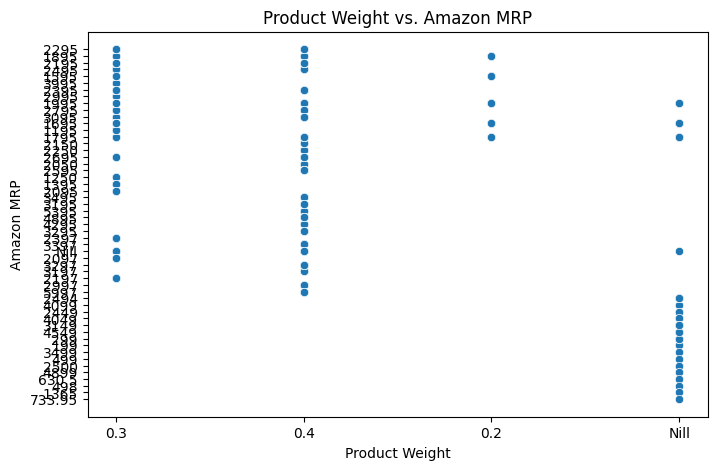

In [ ]:
# 2️⃣ Scatter Plot - Product Weight vs. Price (Amazon)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Product_Weight"], y=df["Amazon_MRP"])
plt.title("Product Weight vs. Amazon MRP")
plt.xlabel("Product Weight")
plt.ylabel("Amazon MRP")
plt.show()

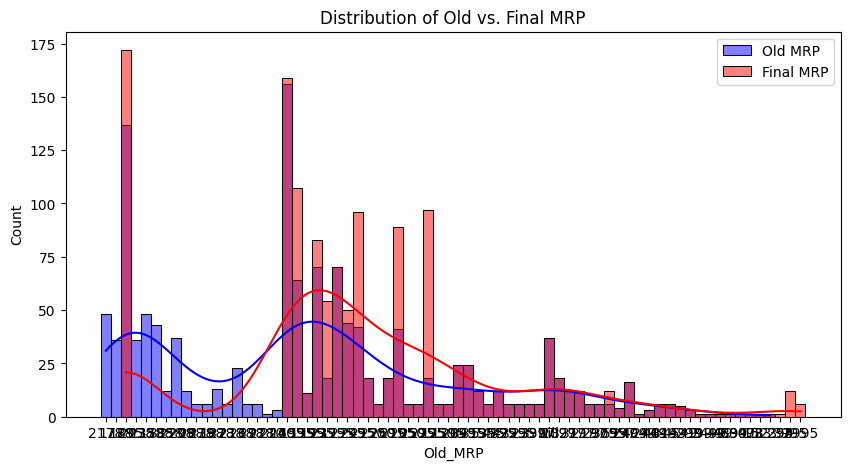

In [ ]:

# 3️⃣ Histogram - Discount Analysis (Old MRP vs. Final MRP)
plt.figure(figsize=(10, 5))
sns.histplot(df["Old_MRP"], kde=True, color="blue", label="Old MRP", bins=30, alpha=0.5)
sns.histplot(df["Final_Old_MRP"], kde=True, color="red", label="Final MRP", bins=30, alpha=0.5)
plt.legend()
plt.title("Distribution of Old vs. Final MRP")
plt.show()

In [ ]:
df = pd.read_csv('/content/May-2022.csv')

# May

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   index             1330 non-null   int64 
 1   Product_SKU       1330 non-null   object
 2   Product_Style_ID  1330 non-null   object
 3   Product_Catalog   1330 non-null   object
 4   Product_Category  1330 non-null   object
 5   Product_Weight    1330 non-null   object
 6   Transfer_Price    1330 non-null   object
 7   Old_MRP           1330 non-null   object
 8   Final_Old_MRP     1330 non-null   object
 9   Ajio_MRP          1330 non-null   object
 10  Amazon_MRP        1330 non-null   object
 11  Amazon_FBA_MRP    1330 non-null   object
 12  Flipkart_MRP      1330 non-null   object
 13  Limeroad_MRP      1330 non-null   object
 14  Myntra_MRP        1330 non-null   object
 15  Paytm_MRP         1330 non-null   object
 16  Snapdeal_MRP      1330 non-null   object
dtypes: int64(1), o

# Amazon Sale Report

In [ ]:
#import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load Amazon Sale Report (replace with actual file path)
df = pd.read_csv("/content/Amazon Sale Report.csv")


In [ ]:

# Convert Order_Date to datetime
df["Order_Date"] = pd.to_datetime(df["Order_Date"])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   index                   128975 non-null  int64         
 1   Order_ID                128975 non-null  object        
 2   Order_Date              128975 non-null  datetime64[ns]
 3   Order_Status            128975 non-null  object        
 4   Fulfillment_Type        128975 non-null  object        
 5   Sales_Channel           128975 non-null  object        
 6   Shipping_Service_Level  128975 non-null  object        
 7   Product_Style           128975 non-null  object        
 8   Product_SKU             128975 non-null  object        
 9   Product_Category        128975 non-null  object        
 10  Product_Size            128975 non-null  object        
 11  Amazon_Standard_ID      128975 non-null  object        
 12  Courier_Status          122103

,index,Order_ID,Order_Date,Order_Status,Fulfillment_Type,Sales_Channel,Shipping_Service_Level,Product_Style,Product_SKU,Product_Category,...,Shipping_State,Shipping_Postal_Code,Shipping_Country,Promotion_IDs,Business_to_Business,Fulfilled_By,Year-Month,Order_Weekday,Order_Hour,Sales_Z_Score
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,2022-04,Saturday,0,NaN
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,2022-04,Saturday,0,NaN
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,2022-04,Saturday,0,NaN
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,2022-04,Saturday,0,NaN
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,TAMIL NADU,600073.0,IN,NaN,False,NaN,2022-04,Saturday,0,NaN


In [ ]:
# # 1. Sales Trend Over Time
# plt.figure(figsize=(12, 5))
# df.groupby("Order_Date").size().plot(marker="o", linestyle="-")
# plt.title("Number of Orders Over Time")
# plt.xlabel("Date")
# plt.ylabel("Order Count")
# plt.xticks(rotation=45)
# plt.grid()
# plt.show()


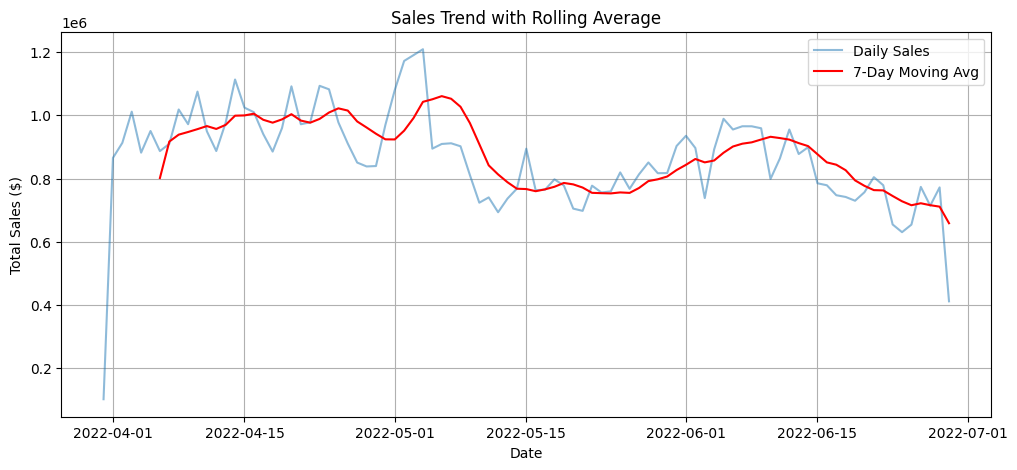

In [ ]:
df["Order_Date"] = pd.to_datetime(df["Order_Date"])
daily_sales = df.groupby("Order_Date")["Sale_Amount"].sum()

# Rolling Average (7-day window)
plt.figure(figsize=(12, 5))
plt.plot(daily_sales, label="Daily Sales", alpha=0.5)
plt.plot(daily_sales.rolling(window=7).mean(), label="7-Day Moving Avg", color="red")
plt.title("Sales Trend with Rolling Average")
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(12, 6))

# # Scatter plot where dot size represents lead time
# plt.scatter(daily_sales.index, daily_sales.values,
#             s=lead_time * 10,  # Scale lead time for better visualization
#             c=daily_sales.values, cmap="coolwarm", alpha=0.7, edgecolors="k")

# plt.colorbar(label="Sales Amount ($)")  # Add color legend
# plt.xlabel("Date")
# plt.ylabel("Sales Amount ($)")
# plt.title("Sales Over Time (Dot Size = Lead Time)")
# plt.grid()

# plt.show()


<Figure size 1200x500 with 0 Axes>

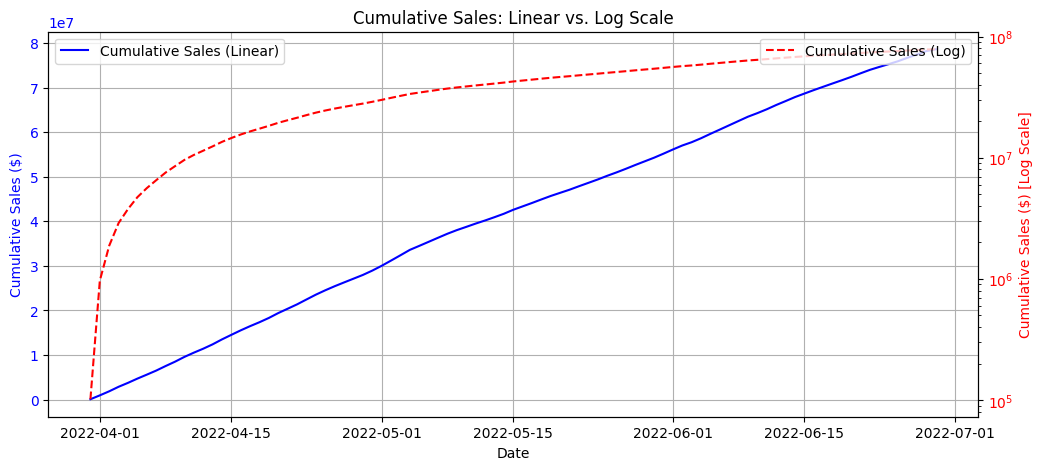

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot on the primary y-axis (Linear Scale)
fig, ax1 = plt.subplots(figsize=(12, 5))
ax1.plot(daily_sales.cumsum(), label="Cumulative Sales (Linear)", color="blue")
ax1.set_xlabel("Date")
ax1.set_ylabel("Cumulative Sales ($)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.set_title("Cumulative Sales: Linear vs. Log Scale")
ax1.grid()

# Create a secondary y-axis (Log Scale)
ax2 = ax1.twinx()
ax2.plot(daily_sales.cumsum(), label="Cumulative Sales (Log)", color="red", linestyle="dashed")
ax2.set_ylabel("Cumulative Sales ($) [Log Scale]", color="red")
ax2.set_yscale("log")  # Apply log scale
ax2.tick_params(axis="y", labelcolor="red")

# Add legends
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

plt.show()


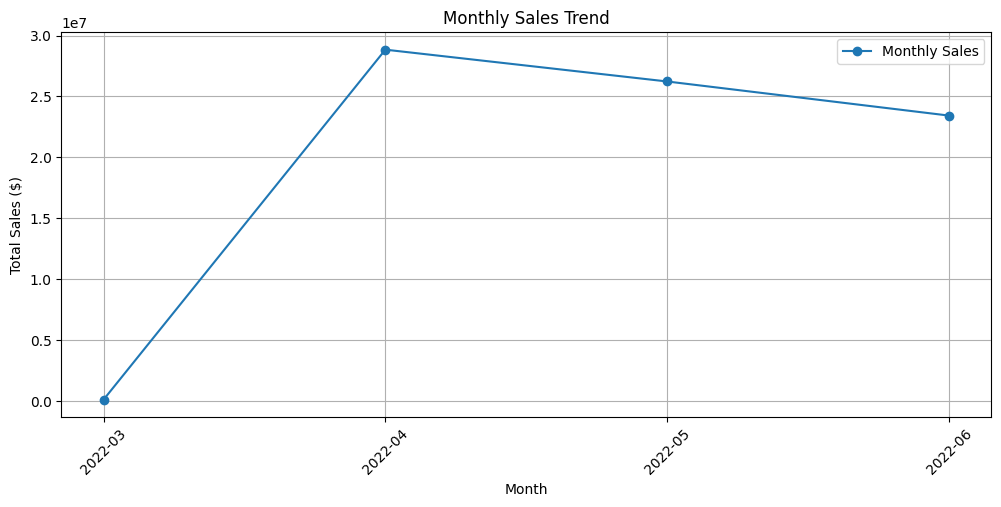

In [ ]:
df["Year-Month"] = df["Order_Date"].dt.to_period("M")  # Convert to Year-Month format
monthly_sales = df.groupby("Year-Month")["Sale_Amount"].sum()

plt.figure(figsize=(12, 5))
plt.plot(monthly_sales.index.astype(str), monthly_sales, marker="o", linestyle="-", label="Monthly Sales")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.show()


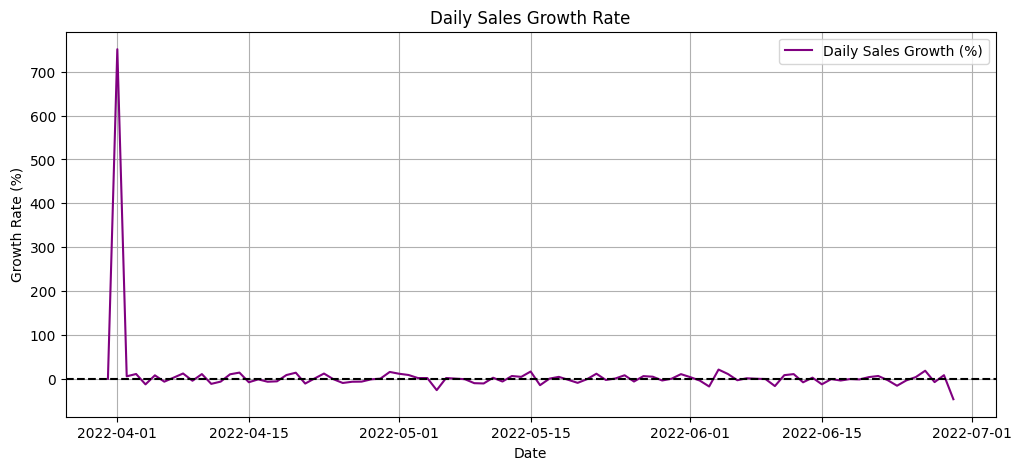

In [ ]:
daily_sales_pct_change = daily_sales.pct_change().fillna(0) * 100  # Convert to percentage

plt.figure(figsize=(12, 5))
plt.plot(daily_sales_pct_change, color="purple", label="Daily Sales Growth (%)")
plt.axhline(y=0, color="black", linestyle="--")
plt.title("Daily Sales Growth Rate")
plt.xlabel("Date")
plt.ylabel("Growth Rate (%)")
plt.legend()
plt.grid()
plt.show()


<ipython-input-8-2ac76b1b2a13>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Fulfillment_Type", palette="pastel")


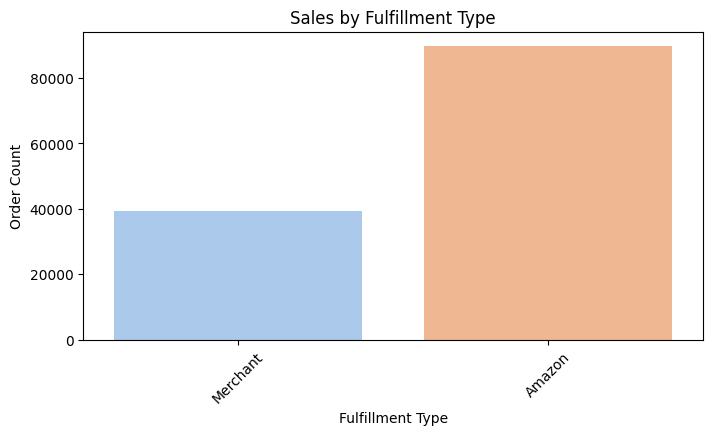

In [ ]:

# 2. Sales by Fulfillment Type
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Fulfillment_Type", palette="pastel")
plt.title("Sales by Fulfillment Type")
plt.xlabel("Fulfillment Type")
plt.ylabel("Order Count")
plt.xticks(rotation=45)
plt.show()


<ipython-input-9-e37c9c58ad29>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.index, y=category_sales.values, palette="coolwarm")


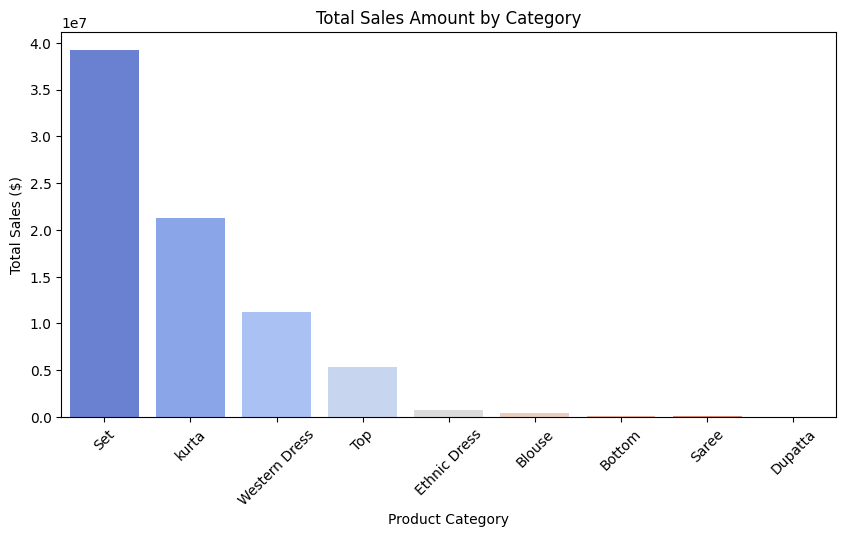

In [ ]:
# 3. Sales Distribution by Category
plt.figure(figsize=(10, 5))
category_sales = df.groupby("Product_Category")["Sale_Amount"].sum().sort_values(ascending=False)
sns.barplot(x=category_sales.index, y=category_sales.values, palette="coolwarm")
plt.title("Total Sales Amount by Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()

<ipython-input-10-54d911468430>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skus.index, y=top_skus.values, palette="viridis")


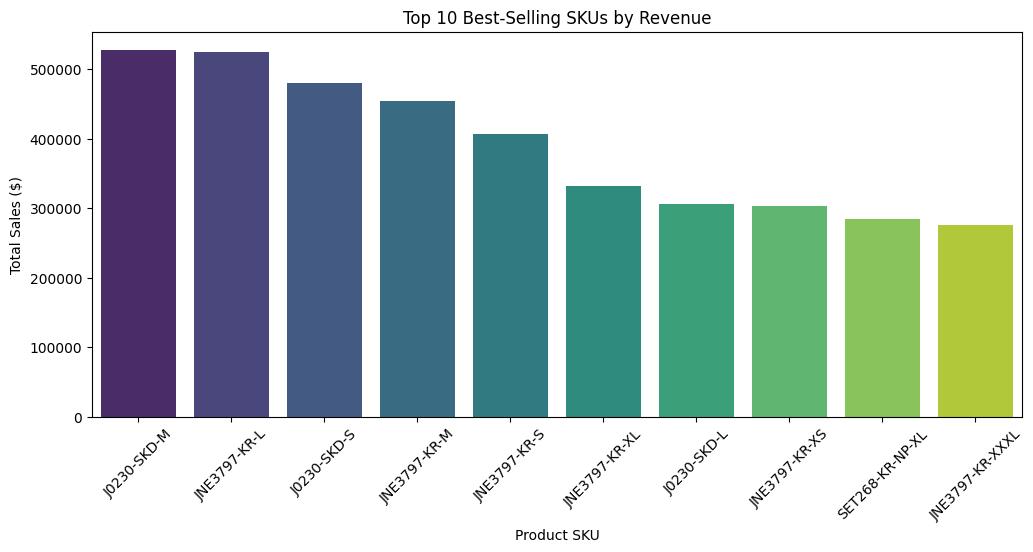

In [ ]:
# 4. Top 10 SKUs by Sales
plt.figure(figsize=(12, 5))
top_skus = df.groupby("Product_SKU")["Sale_Amount"].sum().nlargest(10)
sns.barplot(x=top_skus.index, y=top_skus.values, palette="viridis")
plt.title("Top 10 Best-Selling SKUs by Revenue")
plt.xlabel("Product SKU")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()

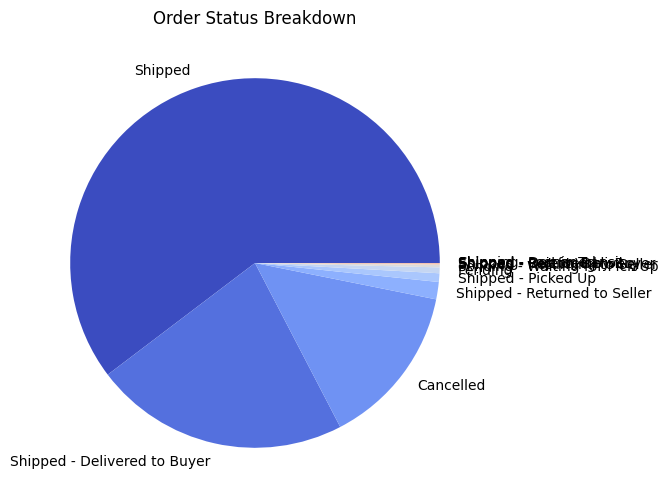

In [ ]:
# 5. Order Status Breakdown
plt.figure(figsize=(6, 6))
df["Order_Status"].value_counts().plot.pie(cmap="coolwarm", shadow=False)
plt.title("Order Status Breakdown")
plt.ylabel("")  # Hide y-label
plt.show()

# international sale report

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (Replace with actual file path)
file_path = "/content/International sale Report.csv"

df = pd.read_csv(file_path)

# Explicitly convert Sale_Date to datetime format (MM/DD/YYYY)
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'], format='%m/%d/%Y', errors='coerce')

# Drop rows where Sale_Date could not be converted
df = df.dropna(subset=['Sale_Date'])

# Extract Month & Year
df['Sale_Month'] = df['Sale_Date'].dt.strftime('%b-%Y')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18635 entries, 0 to 18634
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   index               18635 non-null  int64         
 1   Sale_Date           18635 non-null  datetime64[ns]
 2   Sale_Month          18635 non-null  object        
 3   Customer_Name       18635 non-null  object        
 4   Product_Style       18635 non-null  object        
 5   Product_SKU         17218 non-null  object        
 6   Product_Size        18635 non-null  object        
 7   Quantity_Purchased  18635 non-null  object        
 8   Price_per_Unit      18635 non-null  object        
 9   Gross_Amount        18635 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 1.6+ MB


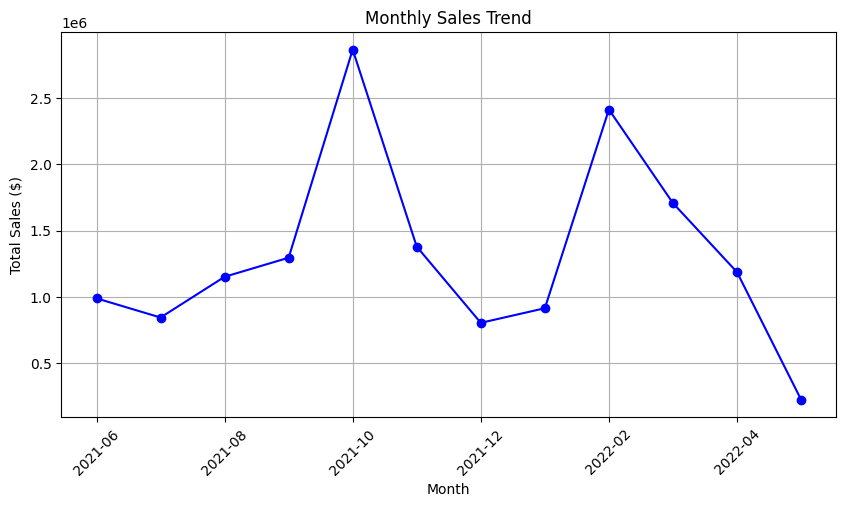

In [ ]:
# Convert 'Gross_Amount' to numeric, forcing errors to NaN
df['Gross_Amount'] = pd.to_numeric(df['Gross_Amount'], errors='coerce')

# Drop rows where Gross_Amount is NaN after conversion
df = df.dropna(subset=['Gross_Amount'])

# Ensure Sale_Month is in correct order
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'], format='%m/%d/%Y', errors='coerce')
df['Sale_Month'] = df['Sale_Date'].dt.strftime('%Y-%m')  # YYYY-MM format for correct sorting

# Monthly Sales Trend
plt.figure(figsize=(10, 5))
df.groupby('Sale_Month')['Gross_Amount'].sum().plot(kind='line', marker='o', color='b')
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.title("Monthly Sales Trend")
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [ ]:

# Explicitly convert Sale_Date to datetime format (MM/DD/YYYY)
df['Sale_Date'] = pd.to_datetime(df['Sale_Date'], format='%m/%d/%Y', errors='coerce')


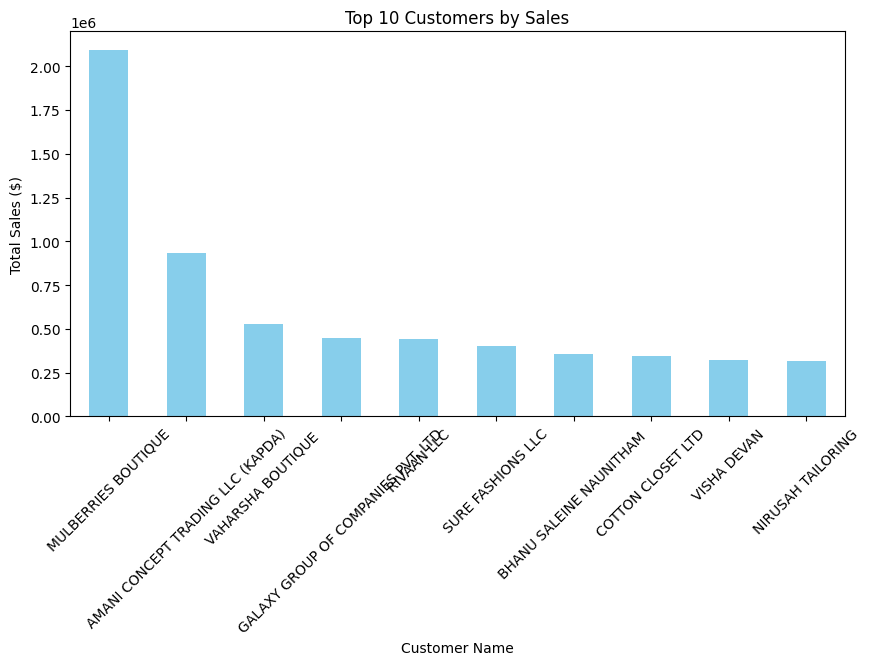

In [ ]:

# Top Customers by Sales
top_customers = df.groupby("Customer_Name")["Gross_Amount"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
top_customers.plot(kind='bar', color='skyblue')
plt.xlabel("Customer Name")
plt.ylabel("Total Sales ($)")
plt.title("Top 10 Customers by Sales")
plt.xticks(rotation=45)
plt.show()

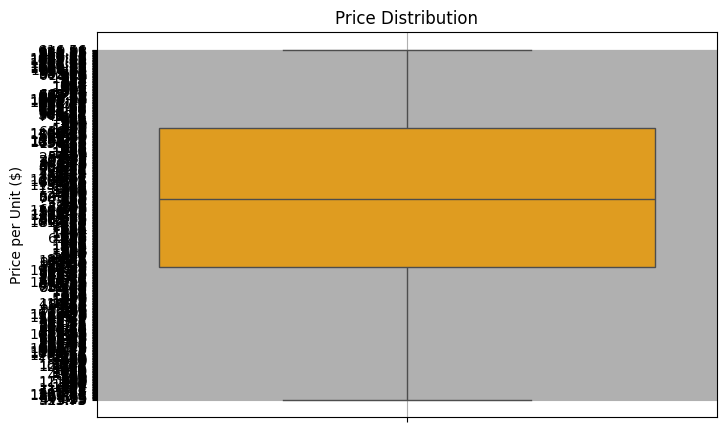

In [ ]:
# Price Distribution Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(y=df["Price_per_Unit"], color="orange")
plt.ylabel("Price per Unit ($)")
plt.title("Price Distribution")
plt.grid()
plt.show()


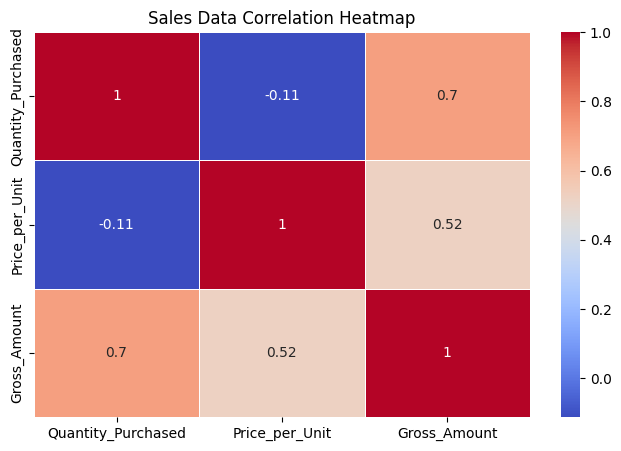

In [ ]:
# Sales Correlation Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df[['Quantity_Purchased', 'Price_per_Unit', 'Gross_Amount']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Sales Data Correlation Heatmap")
plt.show()

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset (modify the path accordingly)
df = pd.read_csv("/content/Expense IIGF.csv", header=0)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   index            17 non-null     int64 
 1   Received_Amount  6 non-null      object
 2   Unnamed: 1       6 non-null      object
 3   Expense_Amount   15 non-null     object
 4   Unnamed: 3       17 non-null     object
dtypes: int64(1), object(4)
memory usage: 812.0+ bytes


,index,Received_Amount,Unnamed: 1,Expense_Amount,Unnamed: 3
0,0,Particular,Amount,Particular,Amount
1,1,6/19/2022,1000,Large Bag,380
2,2,6/20/2022,1500,"Stationary(Soft Pin, Paper pin for Dupatta, Fe...",170
3,3,6/22/2022,500,OLA,839
4,4,6/23/2022,2000,Auto Rent,520


In [32]:
df = df.rename(columns={"Received_Amount": "Received_date", "Unnamed: 1": "Received_Amount"})
df = df.rename(columns={"Expense_Amount": "Expense_product", "Unnamed: 3": "Expense_Amount"})
df = df.drop(index=0).reset_index(drop=True)
df.head()

,index,Received_date,Received_Amount,Expense_product,Expense_Amount
0,1,6/19/2022,1000,Large Bag,380
1,2,6/20/2022,1500,"Stationary(Soft Pin, Paper pin for Dupatta, Fe...",170
2,3,6/22/2022,500,OLA,839
3,4,6/23/2022,2000,Auto Rent,520
4,5,NaN,NaN,TT Fine,500


In [33]:
df["Received_Amount"] = pd.to_numeric(df["Received_Amount"], errors="coerce")
df["Expense_Amount"] = pd.to_numeric(df["Expense_Amount"], errors="coerce")


In [12]:
print(df.isnull().sum())


index               0
Received_Amount    17
Expense_Amount     17
dtype: int64


In [13]:
df.fillna(0, inplace=True)


In [14]:

# df.dropna(inplace=True)


<Figure size 1000x500 with 0 Axes>

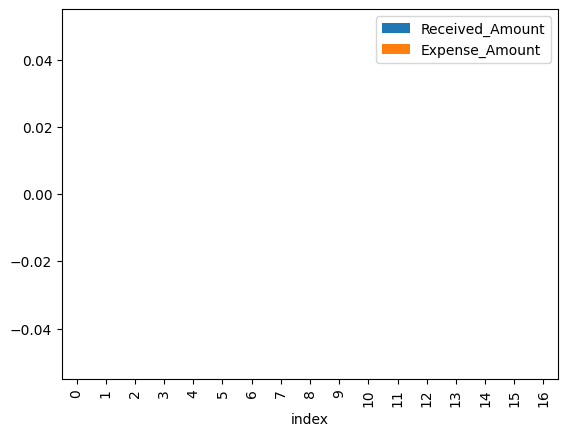

In [16]:
plt.figure(figsize=(10, 5))
df.plot(kind="bar", x="index", y=["Received_Amount", "Expense_Amount"], stacked=False)
plt.show()


In [17]:
df.head()

,index,Received_Amount,Expense_Amount
0,0,0.0,0.0
1,1,0.0,0.0
2,2,0.0,0.0
3,3,0.0,0.0
4,4,0.0,0.0
